# Simulation results
## Full run for scenario 2 - Historical demand

#### Maria Silva, May 2025

## 1. Imports and settings

Let's start by importing the necessary libraries and setting up some directories and files.


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
# plotting theme
sns.set_theme(
    style="whitegrid", palette="Set2", rc={"figure.dpi": 500, "axes.titlesize": 15}
)
meanprops_small = {
    "markerfacecolor": "white",
    "markeredgecolor": "grey",
    "markersize": "6",
}
meanprops_big = {
    "markerfacecolor": "white",
    "markeredgecolor": "grey",
    "markersize": "8",
}

In [3]:
# Main directories and files
current_path = os.getcwd()
repo_dir = os.path.abspath(os.path.join(current_path, ".."))
data_dir = os.path.join(repo_dir, "data")
sim_dir = os.path.join(data_dir, "sim")

In [4]:
meter_names_map = {
    'one_dim_scheme': 'One-dimensional', 
    'compute_vs_others': 'Compute vs. Others', 
    'state_vs_others': 'State vs. Others',
    'access_vs_others': 'Access vs. Others', 
    'bandwidth_vs_others': 'Bandwidth vs. Others',
    'state_vs_compute_vs_others': 'State vs. Compute vs. Others',
    'state_vs_compute_vs_access_vs_others': 'State vs. Compute vs. Access vs. Others'
}
meter_names_map_v2 = {
    'one_dim_scheme': 'One-dimensional', 
    'compute_vs_others': 'Compute vs. Others', 
    'state_vs_others': 'State vs. Others',
    'access_vs_others': 'Access vs. Others', 
    'bandwidth_vs_others': 'Bandwidth vs. Others',
    'state_vs_compute_vs_others': 'State vs. Compute vs. Others',
    'state_vs_compute_vs_access_vs_others': 'State vs. Compute vs. \n Access vs. Others'
}

## 2. Load simulation results

Now, we need to read the csv files that contain the results from the simulation results.

In [5]:
file_name = "historical_txs_sim_results_demand=historical_blocks_6k.csv"
raw_df = pd.read_csv(os.path.join(sim_dir, file_name))
raw_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84000 entries, 0 to 83999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   iter                 84000 non-null  int64  
 1   block                84000 non-null  int64  
 2   utilization          84000 non-null  float64
 3   gas_used             84000 non-null  float64
 4   one_dim_utilization  84000 non-null  float64
 5   throughput           84000 non-null  int64  
 6   mempool_size         84000 non-null  int64  
 7   demand_type          84000 non-null  object 
 8   demand_mul           0 non-null      float64
 9   meter_scheme         84000 non-null  object 
 10  limit                84000 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 7.0+ MB


In [6]:
df = raw_df.copy()

df["gas_used_million"] = df["gas_used"]/1e6
df["Limit"] =np.where(df["limit"]==36000000, "36M", "18M")
df["meter_scheme_v2"] = df["meter_scheme"].map(meter_names_map_v2)
df["meter_scheme"] = df["meter_scheme"].map(meter_names_map)
df["is_mempool_empty"] = df["mempool_size"]==0

df = df.drop(columns=["demand_mul", "iter", "demand_type"])

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84000 entries, 0 to 83999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   block                84000 non-null  int64  
 1   utilization          84000 non-null  float64
 2   gas_used             84000 non-null  float64
 3   one_dim_utilization  84000 non-null  float64
 4   throughput           84000 non-null  int64  
 5   mempool_size         84000 non-null  int64  
 6   meter_scheme         84000 non-null  object 
 7   limit                84000 non-null  float64
 8   gas_used_million     84000 non-null  float64
 9   Limit                84000 non-null  object 
 10  meter_scheme_v2      84000 non-null  object 
 11  is_mempool_empty     84000 non-null  bool   
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 7.1+ MB


In [7]:
df_36 = df[df["Limit"]=="36M"]
df_18 = df[df["Limit"]=="18M"]

In [8]:
scenario_title = "Scenario 2: Historical demand"
meter_order = df["meter_scheme"].unique().tolist()
meter_order_v2 = df["meter_scheme_v2"].unique().tolist()

## 3. Utilization and mempool

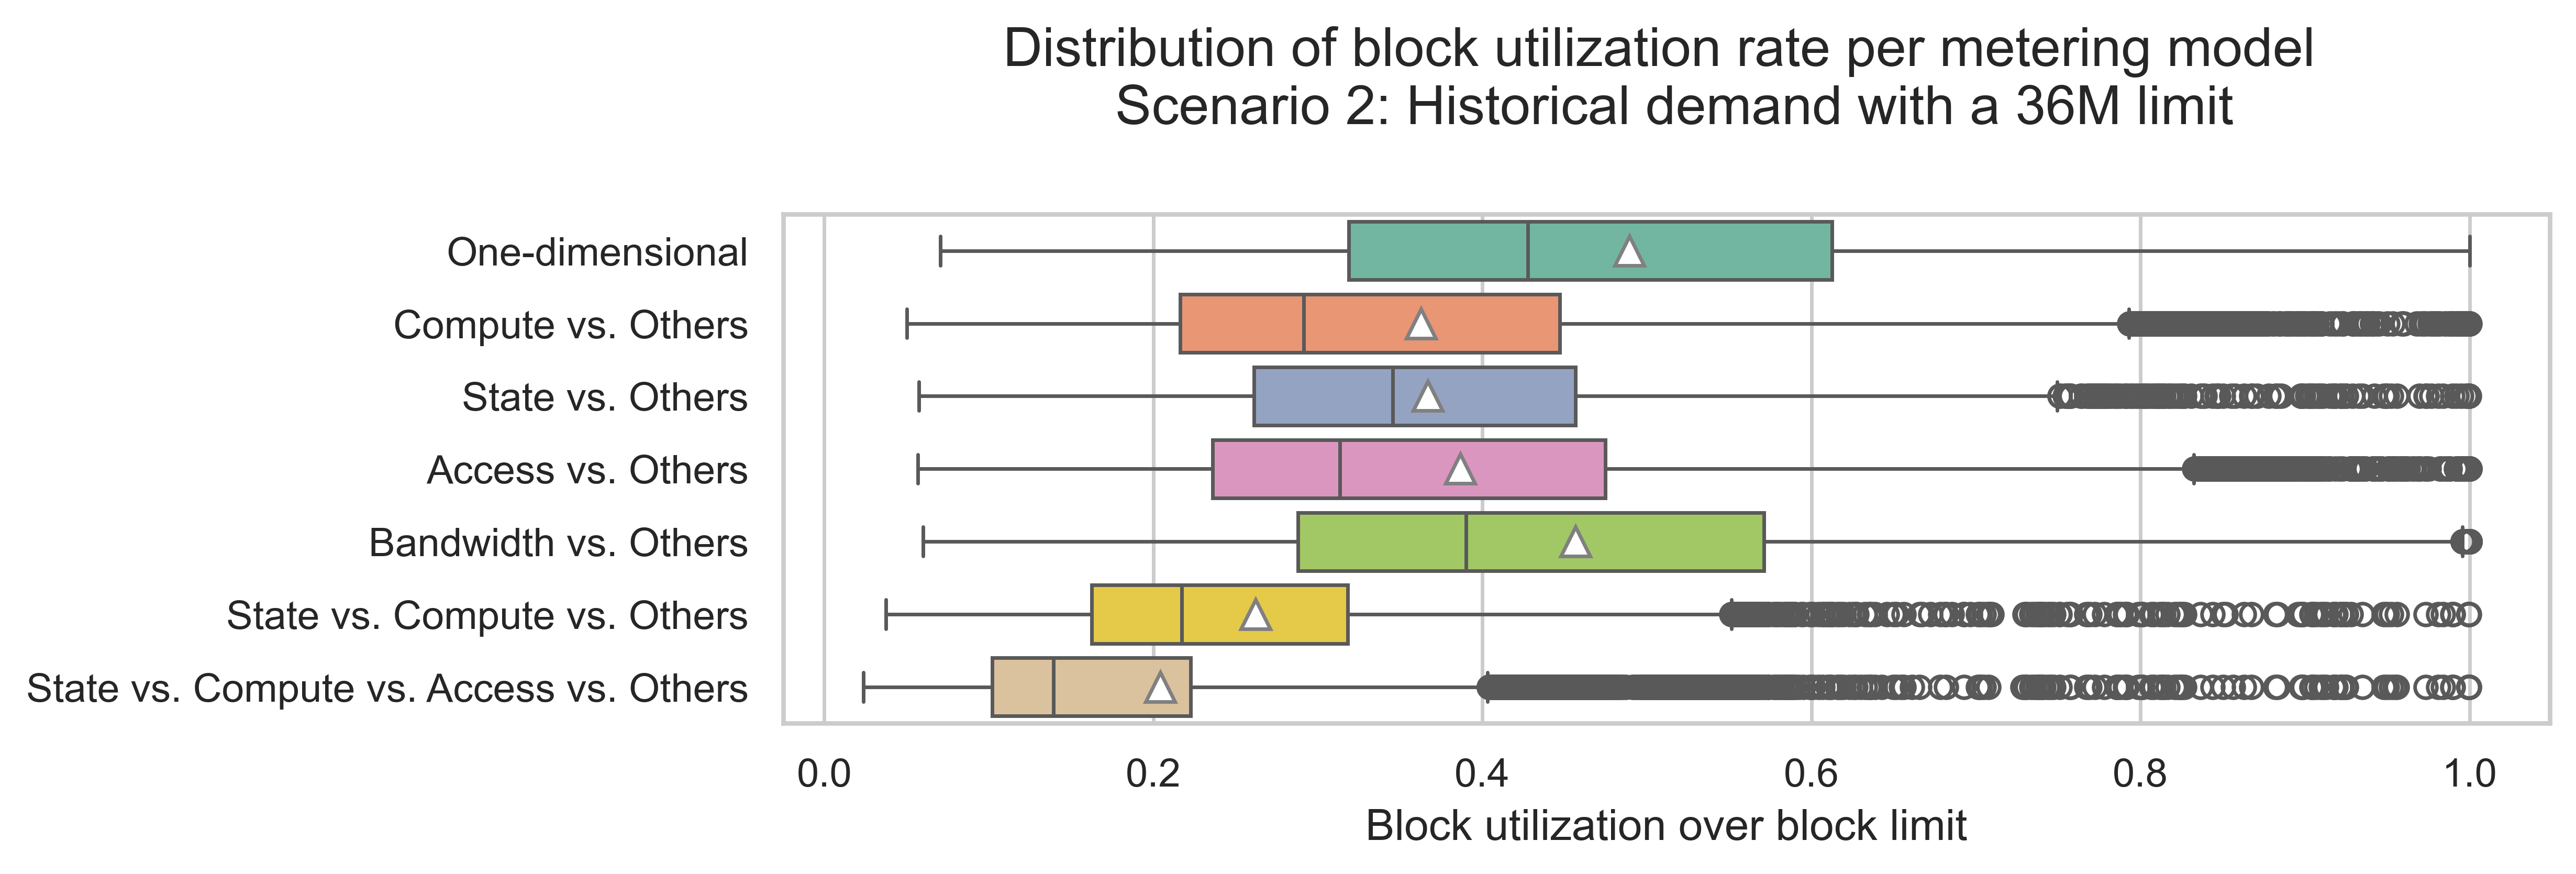

In [9]:
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=df_36,
    x="utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    showmeans=True,
    meanprops=meanprops_big,
)
plt.xlabel("Block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of block utilization rate per metering model \n {scenario_title} with a 36M limit",
    pad=25,
)
plt.tight_layout()
plt.show()

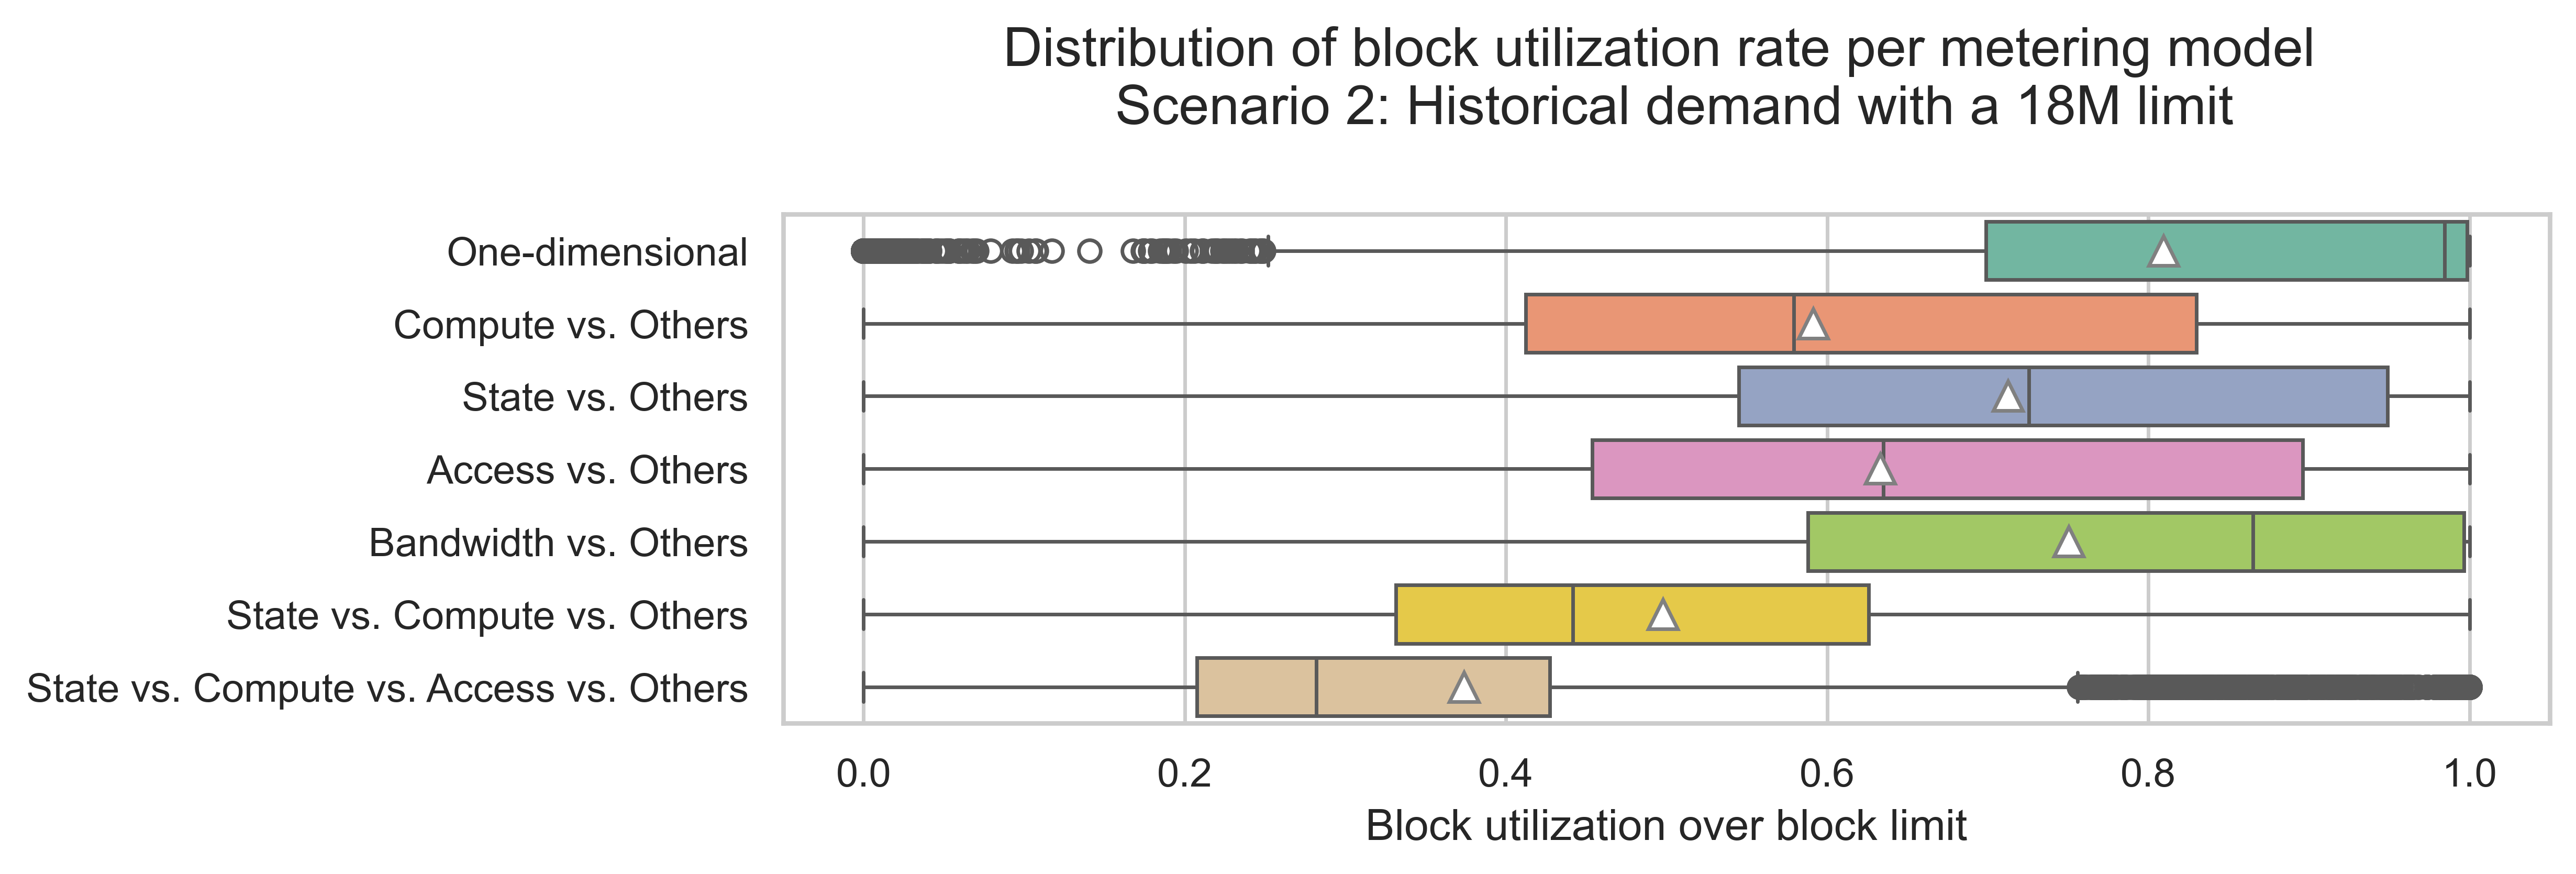

In [10]:
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=df_18,
    x="utilization",
    y="meter_scheme",
    hue="meter_scheme",
    legend=False,
    showmeans=True,
    meanprops=meanprops_big,
)
plt.xlabel("Block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of block utilization rate per metering model \n {scenario_title} with a 18M limit",
    pad=25,
)
plt.tight_layout()
plt.show()

In [11]:
temp_df = df_36.groupby("meter_scheme")["is_mempool_empty"].mean().round(4)
temp_df.loc[meter_order]

meter_scheme
One-dimensional                            0.9445
Compute vs. Others                         0.9828
State vs. Others                           0.9948
Access vs. Others                          0.9798
Bandwidth vs. Others                       0.9595
State vs. Compute vs. Others               0.9950
State vs. Compute vs. Access vs. Others    0.9950
Name: is_mempool_empty, dtype: float64

How long to empty the mempool?

In [12]:
temp = df_36.copy()
temp["cum_is_mempool_empty"] = temp.groupby(["meter_scheme_v2", "limit"])[
    "is_mempool_empty"
].cumsum()
agg_temp = (
    temp.groupby(["meter_scheme_v2", "cum_is_mempool_empty"])["block"]
    .agg(["size", "min"])
    .reset_index()
)
agg_temp = agg_temp.rename(columns={"size": "non_empty_count", "min": "block"})
agg_temp["non_empty_count"] = agg_temp["non_empty_count"] - 1
agg_temp = agg_temp.drop(columns=["cum_is_mempool_empty"])

temp = temp.merge(agg_temp, on=["meter_scheme_v2",  "block"], how="left")

load_temp = temp[temp["non_empty_count"] > 0]
load_temp["non_empty_count"] = np.where(
    load_temp["non_empty_count"] > 3, "4+", load_temp["non_empty_count"].astype("int").astype("str")
)
load_temp = (
    load_temp.groupby("meter_scheme_v2")["non_empty_count"]
    .value_counts()
    .reset_index()
)
load_totals = load_temp.groupby("meter_scheme_v2")["count"].sum().reset_index()
load_totals = load_totals.rename(columns={"count": "totals"})
load_temp = load_temp.merge(load_totals, on="meter_scheme_v2", how="left")
load_temp["perc"] = load_temp["count"] / load_temp["totals"]
load_temp = load_temp.drop(columns=["totals"])
load_temp = load_temp.rename(
    columns={"meter_scheme_v2": "Metering model"}
).sort_values("non_empty_count")
load_temp.head(25)

,Metering model,non_empty_count,count,perc
0,Access vs. Others,1,63,0.715909
18,State vs. Compute vs. Others,1,25,0.925926
4,Bandwidth vs. Others,1,151,0.834254
16,State vs. Compute vs. \n Access vs. Others,1,25,0.925926
12,One-dimensional,1,216,0.853755
8,Compute vs. Others,1,55,0.733333
20,State vs. Others,1,26,0.928571
19,State vs. Compute vs. Others,2,2,0.074074
17,State vs. Compute vs. \n Access vs. Others,2,2,0.074074
13,One-dimensional,2,24,0.094862


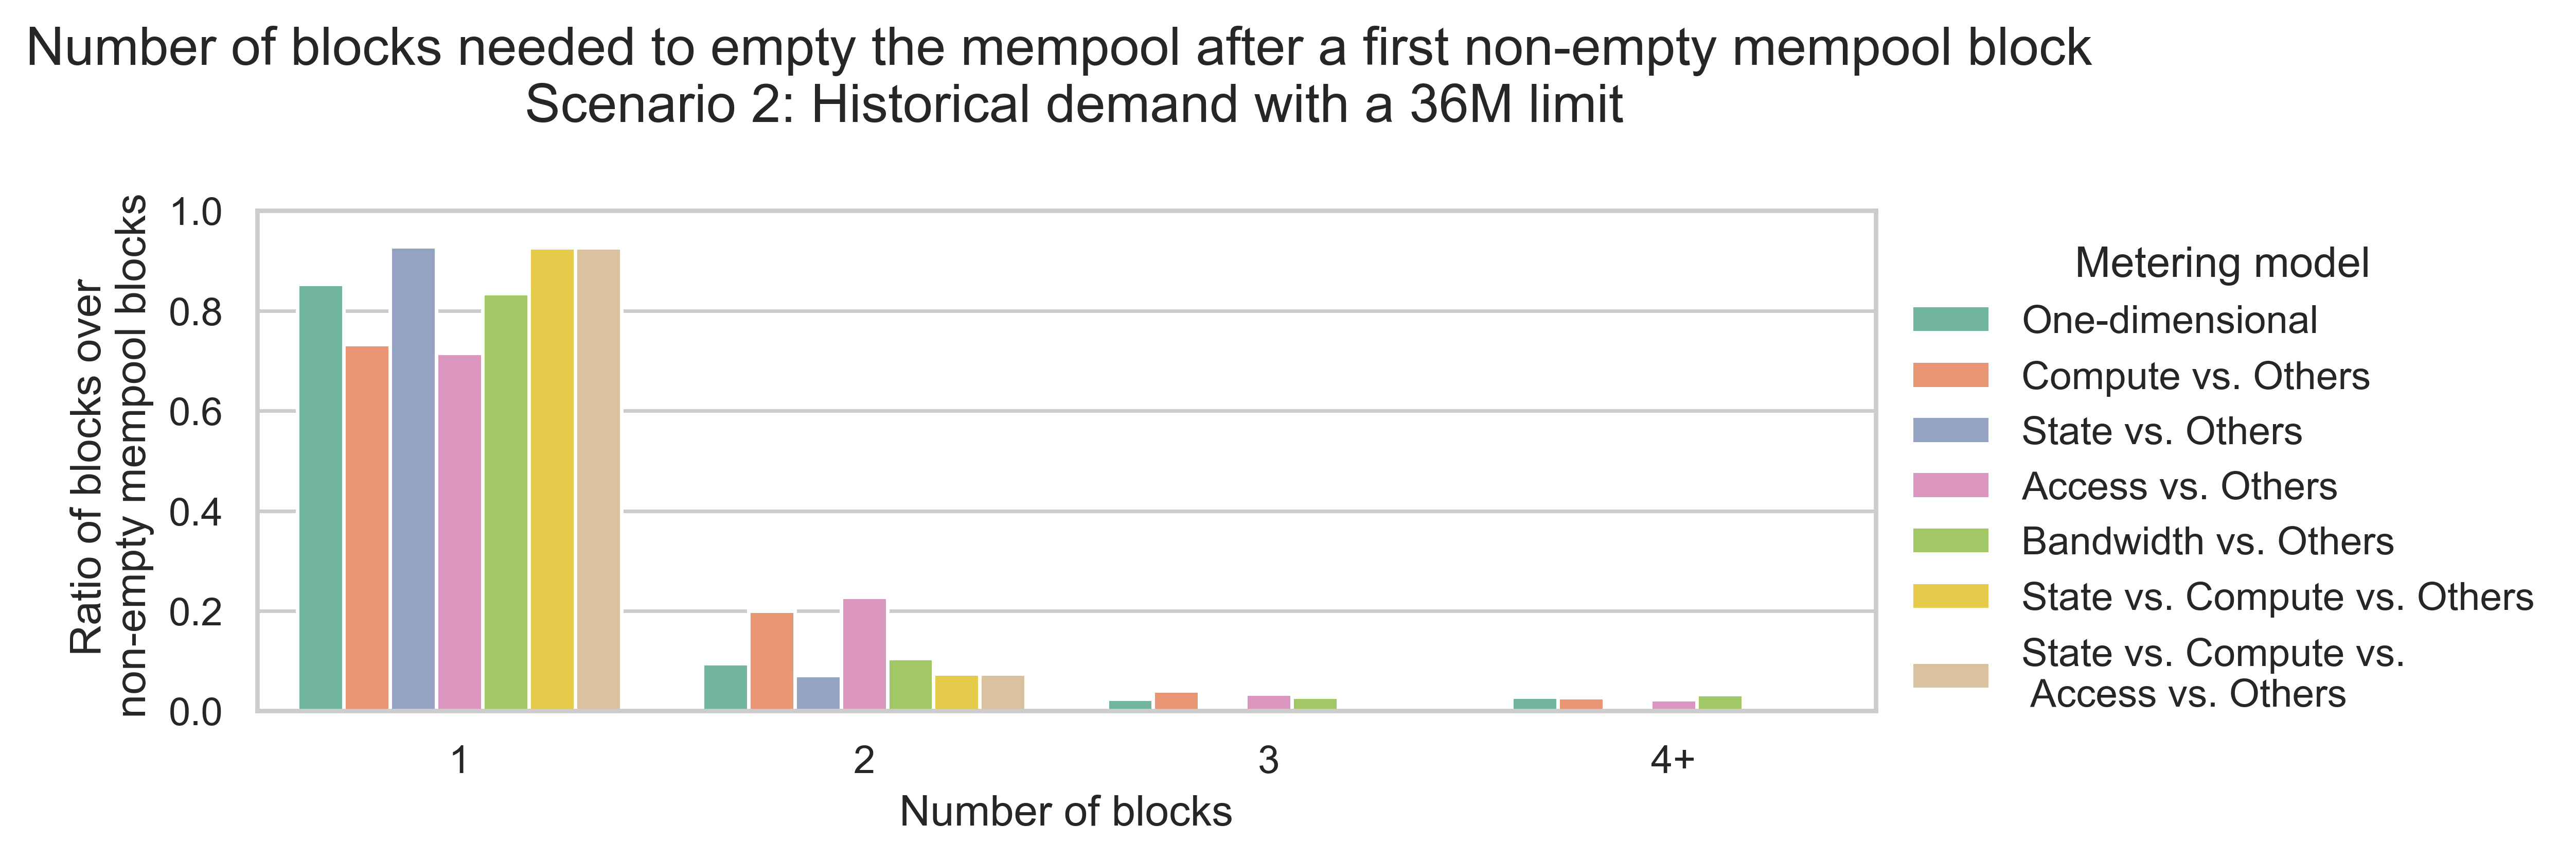

In [13]:
plt.figure(figsize=(10, 3.5))
ax = sns.barplot(
    data=load_temp,
    x="non_empty_count",
    y="perc",
    hue="Metering model",
    palette="Set2",
    hue_order=meter_order_v2,
)
plt.xlabel("Number of blocks")
plt.ylabel("Ratio of blocks over \n non-empty mempool blocks")
plt.title(
    (f"Number of blocks needed to empty the mempool after a " 
     f"first non-empty mempool block \n {scenario_title} with a 36M limit"),
    pad=25,
)
plt.ylim(0,1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.tight_layout()
plt.show()

## 4. Throughput

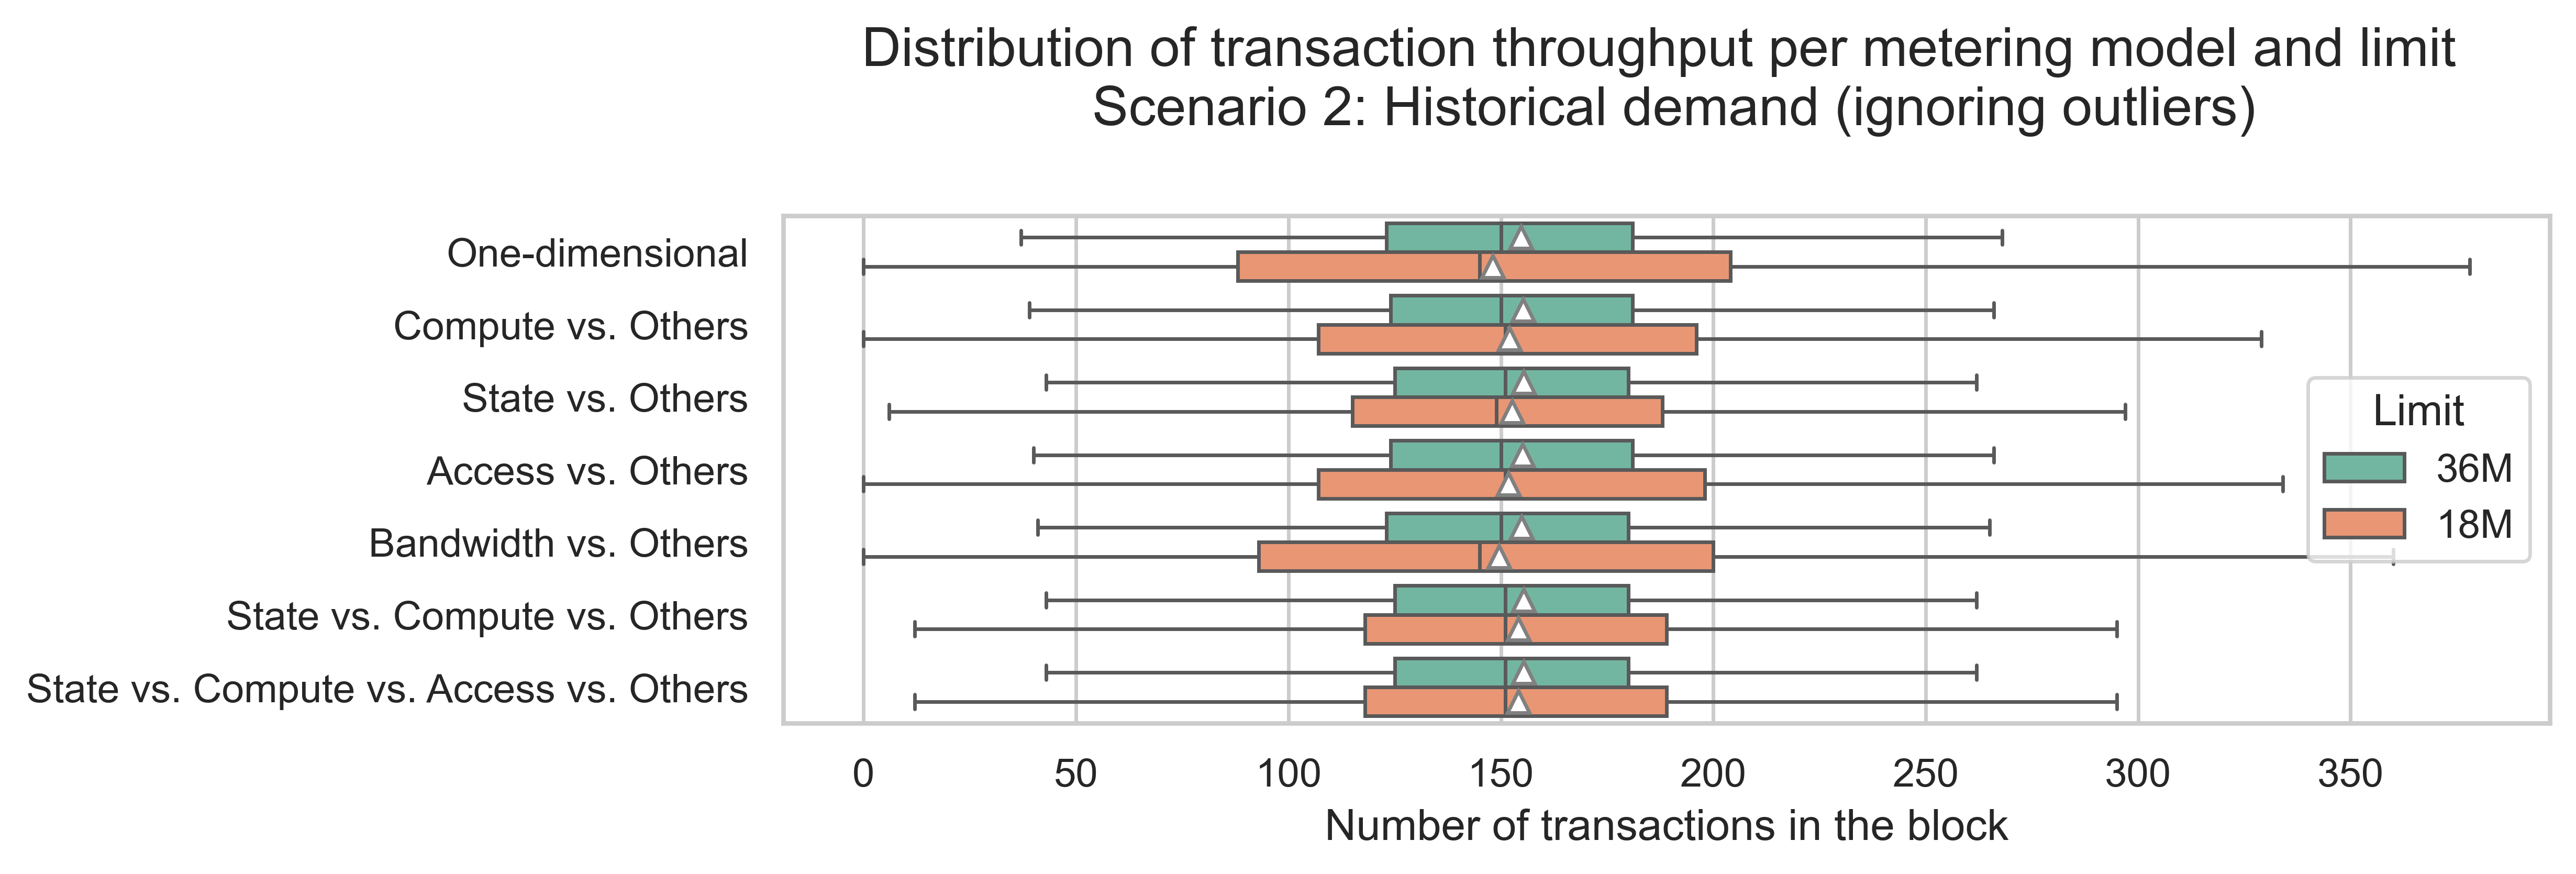

In [14]:
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=df,
    x="throughput",
    y="meter_scheme",
    hue="Limit",
    palette="Set2",
    order=meter_order,
    showfliers=False,
    showmeans=True,
    meanprops=meanprops_small,
)
plt.xlabel("Number of transactions in the block")
plt.ylabel("")
plt.title(
    f"Distribution of transaction throughput per metering model and limit \n {scenario_title} (ignoring outliers)",
    pad=25,
)
plt.tight_layout()
plt.show()

In [15]:
df.groupby(["meter_scheme", "Limit"])["throughput"].agg(["mean", "std", "median"])

mean        std  median
meter_scheme                            Limit                               
Access vs. Others                       18M    151.721833  87.589073   151.0
                                        36M    155.136833  50.960553   150.0
Bandwidth vs. Others                    18M    149.594333  96.069525   145.0
                                        36M    154.891833  53.261446   150.0
Compute vs. Others                      18M    152.067167  88.997161   151.0
                                        36M    155.173500  50.449482   150.0
One-dimensional                         18M    148.017000  94.372081   145.0
                                        36M    154.730000  54.050566   150.0
State vs. Compute vs. Access vs. Others 18M    154.145667  68.803227   151.0
                                        36M    155.311000  47.857647   151.0
State vs. Compute vs. Others            18M    154.093167  68.050449   151.0
                                        36M    155.311167  47.882820   151.0
State vs. Others                        18M    152.603333  69.186314   149.0
                                        36M    155.307667  47.897220   151.0

## 5. Gas used

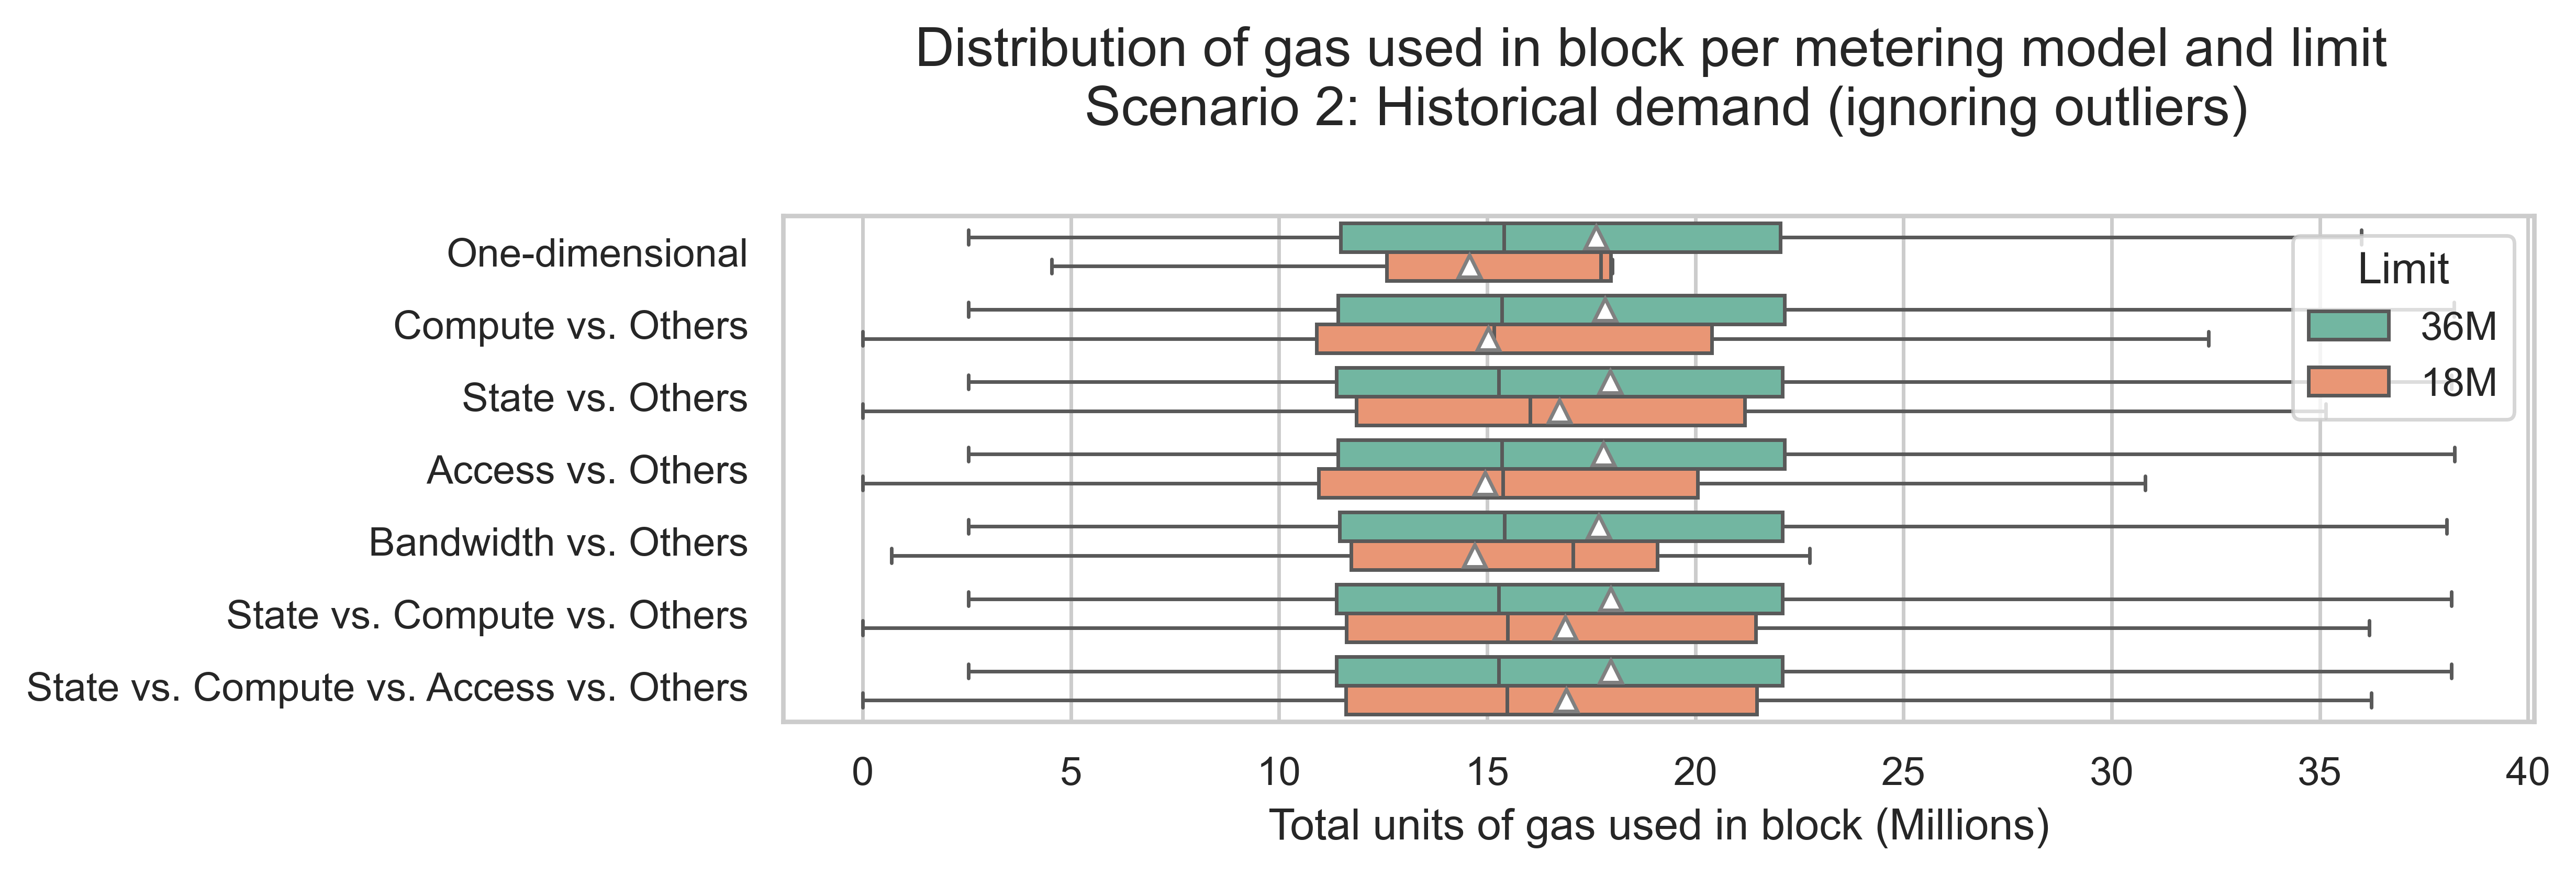

In [16]:
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=df,
    x="gas_used_million",
    y="meter_scheme",
    hue="Limit",
    palette="Set2",
    order=meter_order,
    showfliers=False,
    showmeans=True,
    meanprops=meanprops_small,
)
plt.xlabel("Total units of gas used in block (Millions)")
plt.ylabel("")
plt.title(
    f"Distribution of gas used in block per metering model and limit \n {scenario_title} (ignoring outliers)",
    pad=25,
)
plt.tight_layout()
plt.show()

In [17]:
df.groupby(["meter_scheme", "Limit"])["gas_used_million"].agg(["mean", "std", "median"])

mean       std     median
meter_scheme                            Limit                                
Access vs. Others                       18M    14.951610  6.681993  15.371619
                                        36M    17.791103  9.059660  15.350908
Bandwidth vs. Others                    18M    14.693694  5.696273  17.061826
                                        36M    17.677952  8.762451  15.412707
Compute vs. Others                      18M    15.022080  6.883856  15.163856
                                        36M    17.825397  9.150163  15.345932
One-dimensional                         18M    14.570214  5.185397  17.722803
                                        36M    17.615012  8.620344  15.399233
State vs. Compute vs. Access vs. Others 18M    16.897513  7.619992  15.478739
                                        36M    17.965847  9.614950  15.277787
State vs. Compute vs. Others            18M    16.874345  7.551137  15.483742
                                        36M    17.962764  9.603619  15.277787
State vs. Others                        18M    16.735012  6.809606  16.025956
                                        36M    17.953918  9.589245  15.276122